# 최적화 (Optimize)
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

## 최적화 문제
- 함수 f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)를 찾는 것.
$$
w_{i} = \arg \min_w f(w) 
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 처리
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

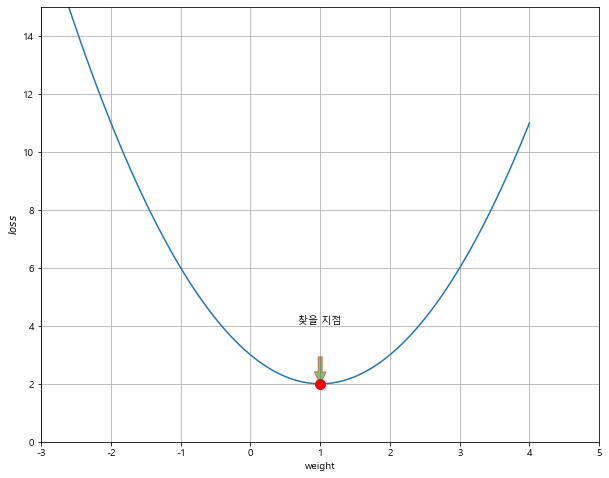

In [21]:
#오차를 구하는 함수
#매개변수(weight) - 최적화할 대상 파라미터
def loss_func(weight):
    return (weight-1)**2 + 2 

plt.figure(figsize=(10,8))
weights = np.linspace(-3,4, 100)

#X:weight들, y:오차들
plt.plot(weights, loss_func(weights))
plt.plot(1,2, 'ro', markersize=10) #극소점

#ha(수평-left, center, right), va(수직-top, center, bottom)는 화살표 기준 text 위치
plt.annotate('찾을 지점', ha='center', va='bottom', 
             xytext=(1, loss_func(1)+2), #화살대 끝의 좌표(텍스트 위치)
             xy=(1, loss_func(1)), #화살표 촉의 좌표
             arrowprops={'facecolor' : 'green', 
                         'edgecolor':'red', 
                         'shrink' : 0.5, #화살표 길이  
                         'alpha':0.5 }) #투명도



plt.ylim(0,15)
plt.xlim(-3,5)
plt.xlabel('weight')
plt.ylabel('$loss$')
plt.grid(True)
plt.show()

In [22]:
#평가함수와는 다름 (이미 완료한 학습에 대해 평가)
#손실 함수는 다름 

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 오차를 정의하는 함수
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - **Classification(분류)의 경우 cross entropy를 사용한다.**
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

## 최적화 문제를 해결하는 방법
- Loss 함수 최적화 함수를 찾는다.
    - Loss를 최소화하는 weight들을 찾는 함수(공식)을 찾는다.
    - Feature와 sample 수가 많아 질 수록 계산량이 급증한다.
    - 최적화 함수가 없는 Loss함수도 있다.
    
- **경사하강법 (Gradient Descent)**
    - 값을 조금씩 조금씩 조정해나가면서 최소값을 찾는다.

## 경사하강법 (Gradient Descent)
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**
- 손실함수를 최소화하는 파라미터를 찾기위해 반복해서 조정해 나간다. 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기)를 계산한다.
    - gradient가 감소하는 방향으로 벡터 $W$를 조정한다.
    - gradient가 0이 될때 까지 반복한다.

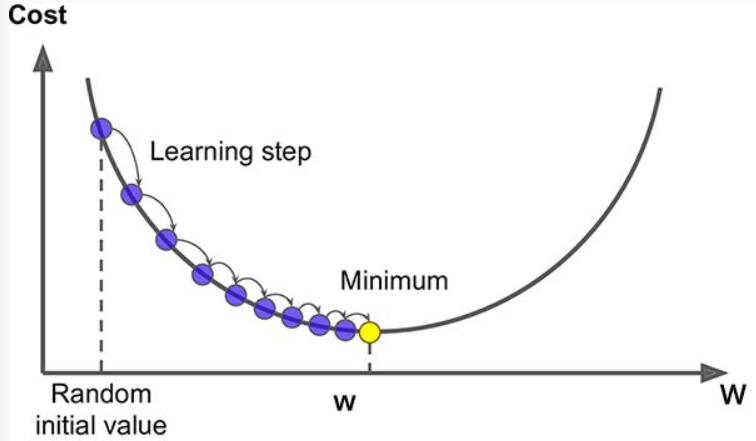

In [23]:
#초기값을 정해두고 시작

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
    - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.
    - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.

In [24]:
#예시임 이런 loss func은 없음
def loss(weight):
    return (weight-1)**2 + 2 

In [25]:
# Gradient를 구할 loss 함수의 도함수
#상수일 때 도함수는 0

def derived_loss(weight):
    return 2*(weight-1)

1차시도: w=0.00, 기울기 = -2.00
2차시도: w=2.20, 기울기 = 2.40
3차시도: w=-0.44, 기울기 = -2.88
4차시도: w=2.73, 기울기 = 3.46
5차시도: w=-1.07, 기울기 = -4.15
6차시도: w=3.49, 기울기 = 4.98


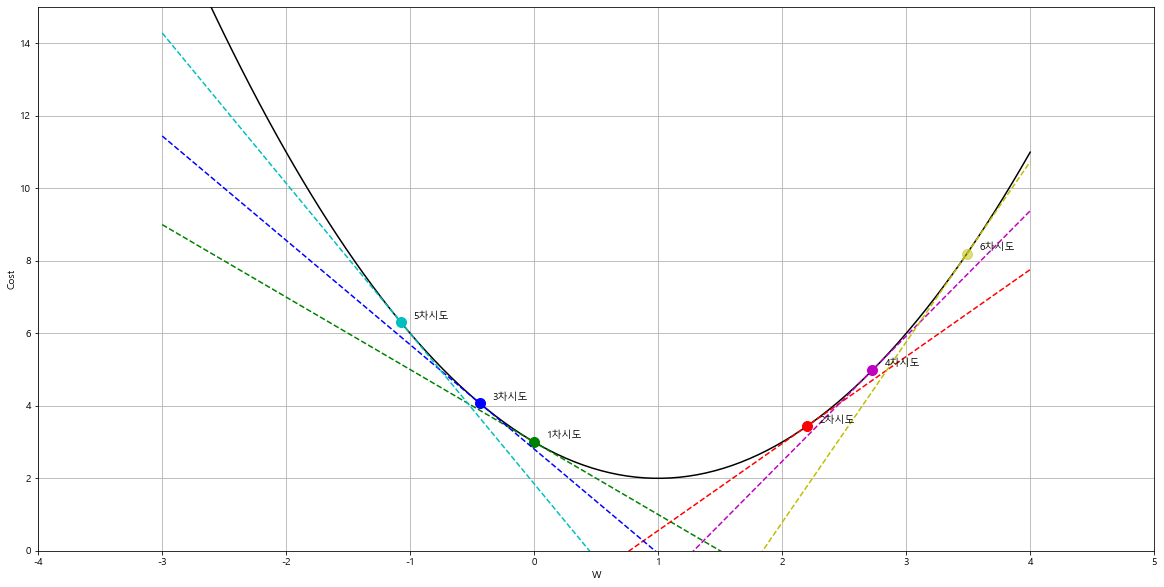

In [32]:
weights = np.linspace(-3,4, 100)

plt.figure(figsize=(20,10))
plt.plot(weights, loss(weights), 'k-') #weight-loss 관계를 선그래프로

#learning_rate = 0.4
#learning_rate = 0.01 
learning_rate = 1.1

# w: 조정할 가중치
w = 0
plt.plot(w, loss(w), 'go', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '1차시도')
plt.plot(weights, derived_loss(w)*(weights) + loss(w), 'g--')
print('1차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'ro', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '2차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'r--')
print('2차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'bo', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '3차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'b--')
print('3차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))


w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'mo', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '4차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'm--')
print('4차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))


w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'co', markersize=10)
plt.text(w+0.1, loss(w)+0.1, '5차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'c--')
print('5차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

w = w - learning_rate*derived_loss(w)
plt.plot(w, loss(w), 'yo', markersize=10, alpha=0.5)
plt.text(w+0.1, loss(w)+0.1, '6차시도')
plt.plot(weights, derived_loss(w)*(weights-w) + loss(w), 'y--')
print('6차시도: w={:.2f}, 기울기 = {:.2f}'.format(w, derived_loss(w)))

plt.ylim(0,15)
plt.xlim(-4,5)
plt.xlabel('W')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [27]:
#w*learninng__Rate-(기울기)
#결과값이 0이 될때까지

#1차 시도 
#0.4*0-(-2)
#2차 시도
#0.4*0.8-(-0.4)
"""
.
.
.
.
"""

'\n.\n.\n.\n.\n'

##### 반복문을 이용해 gradient가 0이 되는 지점의 weight 찾기

In [33]:
######중요
w = np.random.randint(-3,3)
learning_rate = 0.4
# learning_rate = 0.001
# learning_rate = 10
max_iter = 100 #최대 반복횟수
w_list = [w] #weight들을 저장할 리스트 
cnt = 0 #반복횟수 저장할 변수
while True: 
    if derived_loss(w)==0: #기울기 0 => loss가 최소인 지점 중단
        break
    if cnt==max_iter: #현재 반복횟수가 max 반복횟수와 같으면 중단.
        break
    w = w - learning_rate*derived_loss(w)
    w_list.append(w)
    cnt += 1

In [34]:
print('반복횟수:', cnt)
[w_list]

반복횟수: 23


[[2,
  1.2,
  1.04,
  1.008,
  1.0016,
  1.00032,
  1.000064,
  1.0000128,
  1.00000256,
  1.000000512,
  1.0000001024,
  1.00000002048,
  1.000000004096,
  1.0000000008192,
  1.00000000016384,
  1.000000000032768,
  1.0000000000065536,
  1.0000000000013107,
  1.0000000000002622,
  1.0000000000000524,
  1.0000000000000104,
  1.000000000000002,
  1.0000000000000004,
  1.0]]

In [36]:
w_list.pop()

1.0